In [1]:
%matplotlib inline

import os
import json
import easydict

from PIL import Image
import matplotlib.pyplot as plt

import torch
import pytorch_lightning as pl

from noc.utils.main_utils import init_model
from noc.dataset.transforms import build_transform

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ckpt_dir = "results/cc3m_noc"
cfg = easydict.EasyDict(json.load(open(os.path.join(ckpt_dir, "config.json"), "r")))

In [3]:
# load checkpoint
# note that control_signal_at_inference will be set manually.
cfg.experiment.load_from = os.path.join(ckpt_dir, "model.ckpt")
cfg, model = init_model(cfg)
# setting control signal to generate high quality captions
model.control_signal_at_inference[:] = 7
model.to(torch.device("cuda"))
model.eval()
print("initializing model is done")

initializing model is done


In [4]:
# prepare data processing
transform = build_transform("val", {"resolution": 256, "clip_resolution": 224})

In [5]:
# path to COCO validation samples
img_path = [
    "imgs/000000000139.jpg",
    "imgs/000000000285.jpg",
    "imgs/000000000632.jpg",
    "imgs/000000000724.jpg",
    "imgs/000000000776.jpg",
    "imgs/000000000785.jpg",
    "imgs/000000000802.jpg",
    "imgs/000000000872.jpg",
    "imgs/000000000885.jpg",
    "imgs/000000001000.jpg",
]

## Generate captions from images

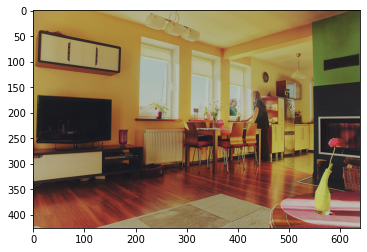

generated:  a family of four is sitting on the floor in their kitchen and watching tv.


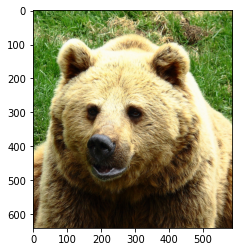

generated:  a brown bear with a big smile.


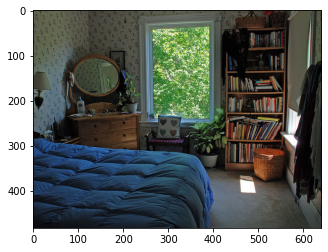

generated:  a window seat with a book shelf and a view of the forest.


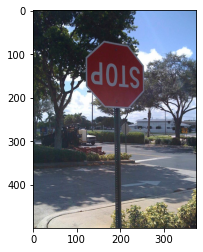

generated:  no parking sign on a road


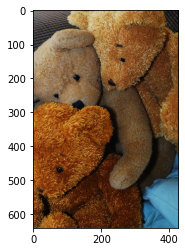

generated:  a teddy bear with a lot of teddy bears


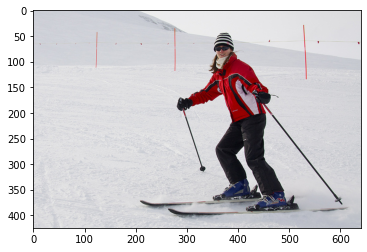

generated:  a skier smiles as she rides down a slope.


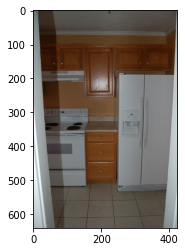

generated:  a picture of the kitchen before the remodel.


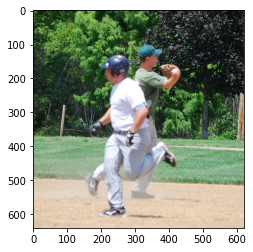

generated:  a baseball player is tagged out at the plate by a player during a game.


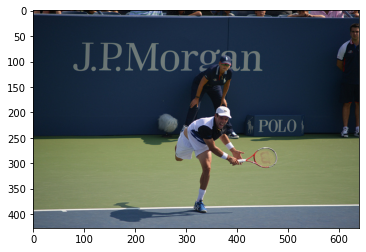

generated:  tennis player plays a forehand in his match against tennis player during day.


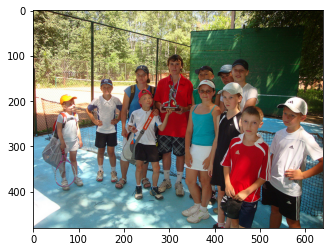

generated:  the tennis team with their trophies


In [6]:
# you can control the quality of captions by chaning following values [0,...,7].
# higher value will provide more aligned captions.
model.control_signal_at_inference[:] = 7

for path in img_path:
    img = Image.open(path).convert("RGB")
    img_tensor = transform(img).to(torch.device("cuda"))[None, :]  # [1, 3, 224, 224]
    
    caption = model.inference(img_tensor)
    plt.imshow(img)
    plt.show()
    print("generated: ", caption[0])